In [ ]:
!pip install mlxtend

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd '/content/drive/MyDrive/CRM'
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import networkx as nx
import matplotlib.font_manager as fm
import numpy as np

mpl.font_manager.fontManager.addfont('/content/drive/MyDrive/fonts/K2D-Regular.ttf')
mpl.rc('font', family='K2D', size=12, weight=200)

/content/drive/MyDrive/CRM


In [ ]:
!wget https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf

--2021-12-26 13:11:57--  https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Phonbopit/sarabun-webfont/master/fonts/thsarabunnew-webfont.ttf [following]
--2021-12-26 13:11:57--  https://raw.githubusercontent.com/Phonbopit/sarabun-webfont/master/fonts/thsarabunnew-webfont.ttf
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 98308 (96K) [application/octet-stream]
Saving to: ‘thsarabunnew-webfont.ttf.4’

thsarabunnew-webfon 100%[===================>]  96.00K  --.-KB/s    in 0.005s  

2021-12-26 13:11:57 (19.7 MB/s) - 

In [ ]:
font_list = fm.createFontList(['thsarabunnew-webfont.ttf'])
fm.fontManager.ttflist.extend(font_list)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: 
The createFontList function was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use FontManager.addfont instead.
  """Entry point for launching an IPython kernel.


In [ ]:
df = pd.read_csv('Prod_Rec.csv')
df.drop(columns=['Timestamp', 'NONE'], inplace=True)
df.rename(columns={'คุณเคยซื้อโต๊ะปรับระดับหรือไม่': 'โต๊ะปรับระดับ'}, inplace=True)
df.fillna(0, inplace=True)
df = df.astype(int)
df.index.name = 'student'

In [ ]:
df.head(5)

,โปรแกรมแท้,เครื่องซักผ้า,รองเท้าวิ่ง,ผักกรอบ,คอร์สเรียนเสริม,nintendo switch,BTC (Bitcoin),mechanical keyboard,เครื่องดูดฝุ่น Dyson,เคส ipad,โต๊ะปรับระดับ,สินค้าจากพิมรี่พาย,I PHONE 13,"หูฟัง bluetooth (airpods,truewireless)",แก้วน้ำ Starbucks,เบาะรองนั่ง,เครื่องชงกาแฟแคปซูล,ตั๋วเครื่องบินไปญี่ปุ่น,Ebook,ตู้เย็น,กล้องฟิล์ม,เครื่องดนตรี,whey protein,วัตถุมงคล,กระบองเพชรพูดได้,ROV Skin
student,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0,0,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0
1,0,0,1,0,1,1,1,1,0,1,0,0,0,1,0,1,0,0,1,0,1,0,1,0,0,1
2,0,0,1,0,1,0,1,0,0,1,0,0,0,1,1,1,0,1,0,0,0,1,0,0,0,0
3,0,0,1,0,1,0,1,0,1,1,0,1,0,1,0,1,0,1,1,1,0,1,0,0,0,0
4,0,0,1,1,1,0,0,0,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0


In [ ]:
missing = df.isnull().any().sum()
print(missing)

0


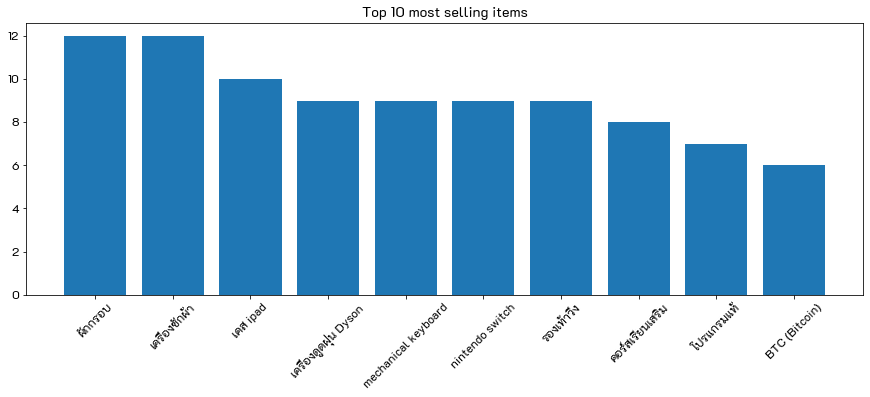

In [ ]:
df_for_top10_Items = df.sum(axis=1).head(10).sort_values(ascending=False)
Item_array = np.arange(len(df_for_top10_Items))

plt.figure(figsize=(15,5))
Items_name = df.columns[df_for_top10_Items.index]
plt.bar(Item_array, df_for_top10_Items.iloc[:])
plt.xticks(Item_array, Items_name, rotation=45)
plt.title('Top 10 most selling items')
plt.show()

In [ ]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

frequent_itemsets = apriori(df, min_support=0.5, use_colnames=True)

In [ ]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,"(หูฟัง bluetooth (airpods,truewireless))",(รองเท้าวิ่ง),0.758621,0.965517,0.758621,1.000000,1.035714,0.026159,inf
1,(รองเท้าวิ่ง),"(หูฟัง bluetooth (airpods,truewireless))",0.965517,0.758621,0.758621,0.785714,1.035714,0.026159,1.126437
2,(Ebook),(รองเท้าวิ่ง),0.655172,0.965517,0.655172,1.000000,1.035714,0.022592,inf
3,(รองเท้าวิ่ง),(Ebook),0.965517,0.655172,0.655172,0.678571,1.035714,0.022592,1.072797
4,(เบาะรองนั่ง),(คอร์สเรียนเสริม),0.551724,0.931034,0.551724,1.000000,1.074074,0.038050,inf
5,(คอร์สเรียนเสริม),(เบาะรองนั่ง),0.931034,0.551724,0.551724,0.592593,1.074074,0.038050,1.100313
6,(Ebook),(คอร์สเรียนเสริม),0.655172,0.931034,0.620690,0.947368,1.017544,0.010702,1.310345
7,(คอร์สเรียนเสริม),(Ebook),0.931034,0.655172,0.620690,0.666667,1.017544,0.010702,1.034483
8,(เครื่องดนตรี),(คอร์สเรียนเสริม),0.551724,0.931034,0.517241,0.937500,1.006944,0.003567,1.103448
9,(คอร์สเรียนเสริม),(เครื่องดนตรี),0.931034,0.551724,0.517241,0.555556,1.006944,0.003567,1.008621


In [ ]:
lift_1_con_0_7 = rules[ (rules['lift'] >= 1) & (rules['confidence'] >= 0.7) ]

In [ ]:
# Recommend 1 item based on 2 items
rec1from2 = lift_1_con_0_7[(lift_1_con_0_7['antecedents'].apply(len) == 2) & (lift_1_con_0_7['consequents'].apply(len) == 1)].sort_values('lift', ascending=False)
rec1from2.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
66,"(เครื่องดนตรี, คอร์สเรียนเสริม)",(เคส ipad),0.517241,0.896552,0.517241,1.000000,1.115385,0.053508,inf
38,"(เบาะรองนั่ง, รองเท้าวิ่ง)",(เคส ipad),0.517241,0.896552,0.517241,1.000000,1.115385,0.053508,inf
54,"(เบาะรองนั่ง, คอร์สเรียนเสริม)",(เคส ipad),0.551724,0.896552,0.551724,1.000000,1.115385,0.057075,inf
48,"(เครื่องดนตรี, รองเท้าวิ่ง)",(เคส ipad),0.517241,0.896552,0.517241,1.000000,1.115385,0.053508,inf
44,"(เคส ipad, รองเท้าวิ่ง)",(Ebook),0.862069,0.655172,0.620690,0.720000,1.098947,0.055886,1.231527
62,"(คอร์สเรียนเสริม, เคส ipad)",(Ebook),0.827586,0.655172,0.586207,0.708333,1.081140,0.043995,1.182266
22,"(เบาะรองนั่ง, รองเท้าวิ่ง)",(คอร์สเรียนเสริม),0.517241,0.931034,0.517241,1.000000,1.074074,0.035672,inf
55,"(เบาะรองนั่ง, เคส ipad)",(คอร์สเรียนเสริม),0.551724,0.931034,0.551724,1.000000,1.074074,0.038050,inf
43,"(Ebook, รองเท้าวิ่ง)",(เคส ipad),0.655172,0.896552,0.620690,0.947368,1.056680,0.033294,1.965517
34,"(เคส ipad, รองเท้าวิ่ง)","(หูฟัง bluetooth (airpods,truewireless))",0.862069,0.758621,0.689655,0.800000,1.054545,0.035672,1.206897


In [ ]:
# Recommend 1 item based on 1 item
rec1from1 = lift_1_con_0_7[(lift_1_con_0_7['antecedents'].apply(len) == 1) & (lift_1_con_0_7['consequents'].apply(len) == 1)].sort_values('lift', ascending=False)
rec1from1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
12,(เบาะรองนั่ง),(เคส ipad),0.551724,0.896552,0.551724,1.000000,1.115385,0.057075,inf
16,(เครื่องดนตรี),(เคส ipad),0.551724,0.896552,0.551724,1.000000,1.115385,0.057075,inf
4,(เบาะรองนั่ง),(คอร์สเรียนเสริม),0.551724,0.931034,0.551724,1.000000,1.074074,0.038050,inf
14,(Ebook),(เคส ipad),0.655172,0.896552,0.620690,0.947368,1.056680,0.033294,1.965517
0,"(หูฟัง bluetooth (airpods,truewireless))",(รองเท้าวิ่ง),0.758621,0.965517,0.758621,1.000000,1.035714,0.026159,inf
1,(รองเท้าวิ่ง),"(หูฟัง bluetooth (airpods,truewireless))",0.965517,0.758621,0.758621,0.785714,1.035714,0.026159,1.126437
2,(Ebook),(รองเท้าวิ่ง),0.655172,0.965517,0.655172,1.000000,1.035714,0.022592,inf
6,(Ebook),(คอร์สเรียนเสริม),0.655172,0.931034,0.620690,0.947368,1.017544,0.010702,1.310345
11,(เคส ipad),"(หูฟัง bluetooth (airpods,truewireless))",0.896552,0.758621,0.689655,0.769231,1.013986,0.009512,1.045977
10,"(หูฟัง bluetooth (airpods,truewireless))",(เคส ipad),0.758621,0.896552,0.689655,0.909091,1.013986,0.009512,1.137931


In [ ]:
edgelist = []
for i,x in rec1from1.iterrows():
    n1, = x['antecedents']
    n2, = x['consequents']
    attr = { 'lift': round(x['lift'],4), 'confidence' : round(x['confidence'], 4) }
    edgelist.append((n1,n2,attr))

nodes = { n1 for n1, n2, attr in edgelist}.union({ n2 for n1, n2, attr in edgelist})

support_df = frequent_itemsets[frequent_itemsets['itemsets'].apply(len)==1].copy()
support_df['item'] = support_df['itemsets'].apply(lambda x: list(x)[0])
support_df = support_df[support_df['item'].isin(nodes)]

nodelist = []
for i,x in support_df.iterrows():
    n = x['item']
    attr = { 'support' : round(x['support'],4) }
    nodelist.append((n, attr))

# create graph
G = nx.DiGraph()

G.add_nodes_from(nodelist)
G.add_edges_from(edgelist)

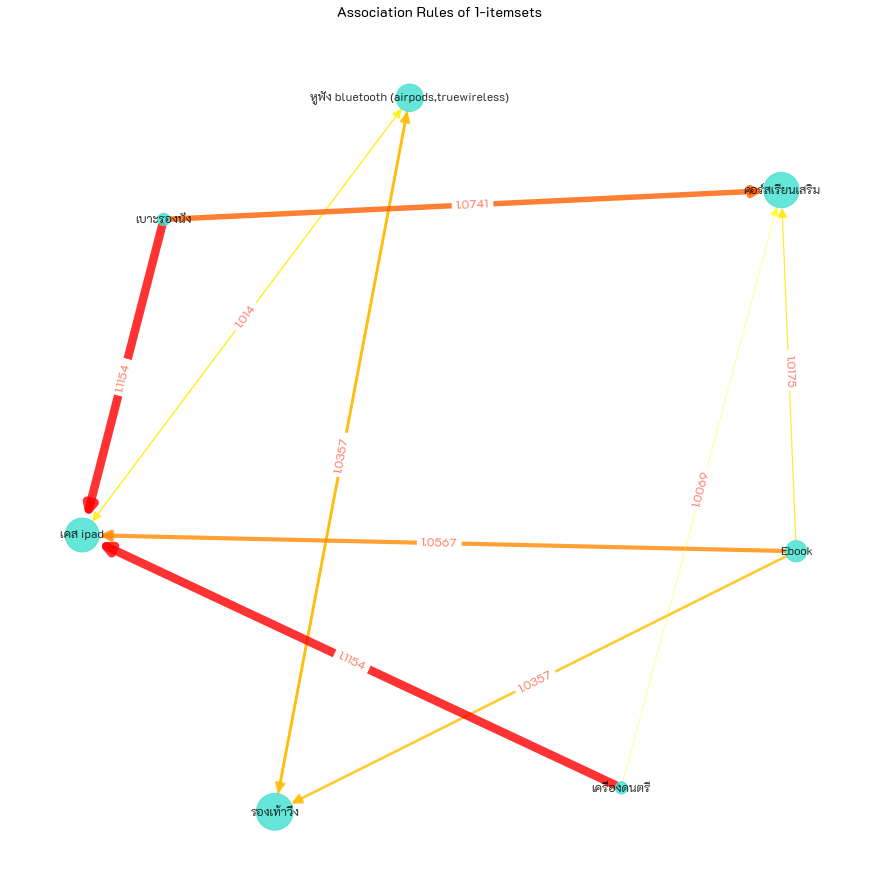

In [ ]:
nodelist, node_size = zip(*[(n,d['support']) for n,d in G.nodes(data=True)])
node_size = 150 + ((np.array(node_size) - min(node_size)) / (max(node_size) - min(node_size)))*1200
edgelist, width = zip(*[((u,v), d['lift'])for u,v,d in G.edges(data=True)])

width = .5 + ((np.array(width) - min(width)) / (max(width) - min(width)))*8

labels_params = {'font_family': 'K2D', 'alpha':.8, 'font_size':12}

plt.figure(figsize=(12,12))

pos = nx.spring_layout(G, k=5, weight='lift', iterations=80, seed=90, scale=2.5)
nx.draw(G, pos, with_labels=True, arrowsize=20, 
        edgelist=edgelist, width=width, edge_color=width, edge_cmap=plt.cm.autumn_r,
        nodelist=nodelist, node_size=node_size, node_color='turquoise', 
        **labels_params)
edge_labels = nx.get_edge_attributes(G, 'lift')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='tomato',  **labels_params)

plt.title('Association Rules of 1-itemsets')
plt.show()

สรุป

1. หูฟัง bluetooth และ รองเท้าวิ่ง เป็นของที่มักซื้อคู่กันไม่ว่าจะซื้อชิ้นไหนก่อนหลัง ฉะนั้นควรจัดรายการส่งเสริมการขายสินค้า 2 ชนิดนี้คู่กัน
2. จากการแนะนำสินค้าจากสินค้าที่ซื้อก่อน 2 ชิ้น พบว่า หูฟัง bluetooth สัมพันธ์กับ case ipad ซึ่งอาจอนุมานได้ว่า ผู้ซื้อมี ipad จึงอาจแนะนำสินค้าชนิดอื่นที่มีความสัมพันธ์กับ ipad เช่น คอร์สเรียนเสริม หรือ ebook ให้กับ ผู้ซื้อคนนั้นได้